benign

A - 99 #+1

F - 238

PT - 94

TA - 134 #+2

malignant

DC - 858 #+1

LC - 141 #+1

MC - 190 #+2

PC - 130 #+1


#Comparison #1
[Paper 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6390493//)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data
from torch.utils.data import Subset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau
from sklearn import metrics
from torch.nn import functional as F
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder


import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)





# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1./255)
       # rotation_range=40,
       # height_shift_range=0.2,
       # shear_range=0.2,
       # zoom_range=0.2,
       # horizontal_flip=True,
       # fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/",
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/",
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 480 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [ ]:
print("label map for train: ",train_generator.class_indices)
print("")
print("----")
print("")
print("label map for val data: ",valid_generator.class_indices)

label map for train:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}

----

label map for val data:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}


In [ ]:
print("Train classes: ",train_generator.classes)
print("")
print("Valid classes: ",valid_generator.classes)

Train classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

Valid cla

In [ ]:
input_shape = (299, 299, 3)
base_model = tf.keras.applications.InceptionResNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape)
base_model.summary()

225222656/225209952 [==============================] - 5s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)  

In [ ]:
for layer in base_model.layers:
    layer.trainable = False  #True

In [ ]:
import tensorflow_hub as hub
inputs = tf.keras.layers.Input(shape=[299, 299, 3])


x = Dropout(0.1)(base_model.layers[-2].output)
x = Dense(8, activation='softmax', name='predictions')(x)
model = tf.keras.Model(base_model.inputs, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

epochs = 70
batch_size = 32
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    decay_steps =240, decay_rate = 0.7,
    initial_learning_rate=0.0002)


#opt = keras.optimizers.SGD(learning_rate = 0.001, momentum = 1)
opt = keras.optimizers.Adam(learning_rate = lr_schedule)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.9, epsilon=1e-07)

model.compile(optimizer=opt ,  #rmsprop #sgd
              loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(train_generator, shuffle = True, batch_size=batch_size,
          epochs=epochs, verbose=1,  validation_data = valid_generator)  #steps_per_epoch= 200, validation_steps= 200

Epoch 1/70
120/120 [==============================] - 262s 2s/step - loss: 2.0257 - accuracy: 0.1813 - val_loss: 2.0697 - val_accuracy: 0.1750
Epoch 2/70
120/120 [==============================] - 21s 172ms/step - loss: 1.7806 - accuracy: 0.3562 - val_loss: 2.0519 - val_accuracy: 0.3000
Epoch 3/70
120/120 [==============================] - 21s 172ms/step - loss: 1.6628 - accuracy: 0.4479 - val_loss: 2.0564 - val_accuracy: 0.2500
Epoch 4/70
120/120 [==============================] - 21s 171ms/step - loss: 1.5461 - accuracy: 0.5167 - val_loss: 2.0259 - val_accuracy: 0.2750
Epoch 5/70
120/120 [==============================] - 21s 173ms/step - loss: 1.4827 - accuracy: 0.5542 - val_loss: 2.0195 - val_accuracy: 0.2750
Epoch 6/70
120/120 [==============================] - 20s 171ms/step - loss: 1.4482 - accuracy: 0.5562 - val_loss: 2.0192 - val_accuracy: 0.2500
Epoch 7/70
120/120 [==============================] - 21s 172ms/step - loss: 1.4055 - accuracy: 0.5833 - val_loss: 2.0224 - val_accu

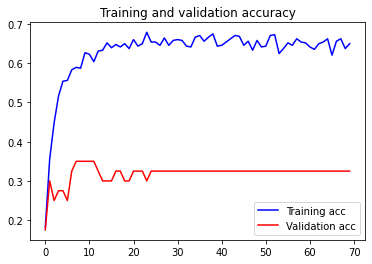

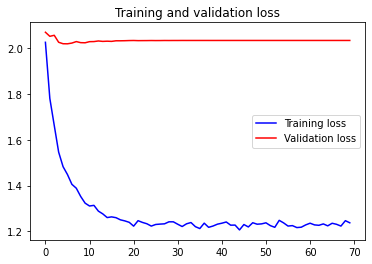

In [ ]:
import matplotlib.pyplot as plt
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

In [ ]:
model.save("/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/incresv2_2nd_time.h5" )

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/incresv2_2nd_time.h5')

#testing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/",
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",  #None
    shuffle=False,
    #seed=42
)
nBatches = 1

Found 1876 images belonging to 8 classes.


In [ ]:
test_generator.reset()

In [ ]:
y_true = test_generator.classes

In [ ]:
print("Test images class lables: ",y_true)

Test images class lables:  [0 0 0 ... 7 7 7]


In [ ]:
pred=model.predict_generator(generator=test_generator, steps=test_generator.samples//nBatches, max_queue_size=10,
                                workers=1, use_multiprocessing=False, verbose=1)

1876/1876 [==============================] - 801s 418ms/step


In [ ]:
#y_pred = np.argmax(pred,axis=1)
print("Test images predicted labels: ", pred)

Test images predicted labels:  [[0.37179238 0.23430827 0.13751984 ... 0.03108265 0.04302264 0.03137828]
 [0.3075569  0.13161121 0.08373711 ... 0.03177499 0.09466746 0.1877103 ]
 [0.20830037 0.09626518 0.10842744 ... 0.03109502 0.08691482 0.22207   ]
 ...
 [0.05842526 0.13678052 0.08356983 ... 0.16417296 0.22562642 0.20249471]
 [0.24650165 0.07803284 0.19713959 ... 0.01459692 0.03376564 0.06973875]
 [0.04014068 0.1460093  0.07148135 ... 0.23520787 0.28395855 0.11796959]]


In [ ]:
pred.shape

(1876, 8)

In [ ]:
y_prd = np.argmax(pred,axis=1)
print("y_prd shape: ",y_prd.shape)
print("")
print("y_true.shape", y_true.shape)

y_prd shape:  (1876,)

y_true.shape (1876,)


In [ ]:
score = model.evaluate_generator(generator=test_generator,
                                     steps=test_generator.samples//nBatches,
                                     max_queue_size=10,
                                     workers=1,
                                     use_multiprocessing=False,
                                     verbose=1)
print("Test loss: %.3f - Test acc: %.3f" % (score[0], score[1]))


1876/1876 [==============================] - 149s 77ms/step - loss: 1.8896 - accuracy: 0.2361
Test loss: 1.890 - Test acc: 0.236


In [ ]:
print(score)

[1.889595866203308, 0.23614072799682617]


#EVALUATION

<font size = 5><font color="yellow">Confusion matrix & classification report

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_prd)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[ 27  14  15   9  14   1  17   1]
 [ 21  90  29  60   8   9  18   3]
 [ 19  38  21  14   1   1   0   0]
 [  7  21  13  53  14   3  20   1]
 [ 38 142  33 138 133  36 296  41]
 [  3  14  12  16   4  30  60   1]
 [ 21  34   7  14  10  11  74  17]
 [ 29  20   8  22   5   5  25  15]]


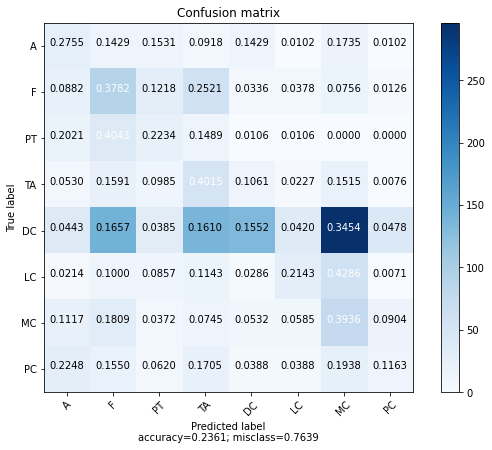

In [ ]:
import numpy as np
import itertools

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):



    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm, target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_prd)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_prd, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_prd, target_names=['Class 0- A:', 'Class 1- F:', 'Class 2- PT:', 'Class 3- TA:','Class 4- DC:','Class 5- LC:','Class 6- MC:', 'Class 7- PC:'], digits = 4))



Accuracy: 0.24

Micro Precision: 0.24
Micro Recall: 0.24
Micro F1-score: 0.24

Macro Precision: 0.26
Macro Recall: 0.27
Macro F1-score: 0.22

Weighted Precision: 0.43
Weighted Recall: 0.24
Weighted F1-score: 0.24

Classification Report

              precision    recall  f1-score   support

 Class 0- A:     0.1636    0.2755    0.2053        98
 Class 1- F:     0.2413    0.3782    0.2946       238
Class 2- PT:     0.1522    0.2234    0.1810        94
Class 3- TA:     0.1626    0.4015    0.2314       132
Class 4- DC:     0.7037    0.1552    0.2543       857
Class 5- LC:     0.3125    0.2143    0.2542       140
Class 6- MC:     0.1451    0.3936    0.2120       188
Class 7- PC:     0.1899    0.1163    0.1442       129

    accuracy                         0.2361      1876
   macro avg     0.2589    0.2697    0.2222      1876
weighted avg     0.4306    0.2361    0.2398      1876



<font size = 5><font color="yellow">ROC AUC score/curve

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
scr1 = roc_auc_score(y_true, pred, multi_class='ovo', average='macro')
scr3 = roc_auc_score(y_true, pred, multi_class='ovr', average='macro')
scr2 = roc_auc_score(y_true, pred, multi_class='ovo', average='weighted')
scr4 = roc_auc_score(y_true, pred, multi_class='ovr', average='weighted')

print("macro - ovo ROC AUC Score: ", scr1)
print("")

print("weighted - ovo ROC AUC Score: ", scr2)
print("")

print("macro - ovr ROC AUC Score: ", scr3)
print("")

print("weighted - ovr ROC AUC Score: ", scr4)
print("")


macro - ovo ROC AUC Score:  0.7011088344885369

weighted - ovo ROC AUC Score:  0.6968321609556456

macro - ovr ROC AUC Score:  0.6976514582069377

weighted - ovr ROC AUC Score:  0.6928828255474775



class 0 - A  : --AUC---> 0.37
class 1 - F  : --AUC---> 0.32
class 2 - PT  : --AUC---> 0.22
class 3 - TA  : --AUC---> 0.45
class 4 - DC  : --AUC---> 0.62
class 5 - LC  : --AUC---> 0.63
class 6 - MC  : --AUC---> 0.57
class 7 - PC  : --AUC---> 0.45


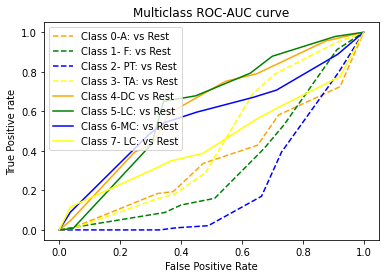

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']
n_class = 8

for i in range(len(target_names)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_prd[:], pos_label=i)
    auroc = round(metrics.auc(fpr[i], tpr[i]),2)
    print('class',i,'-', target_names[i],' :','--AUC--->',auroc)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0-A: vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1- F: vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2- PT: vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3- TA: vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='orange', label='Class 4-DC vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class 5-LC: vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-',color='blue', label='Class 6-MC: vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-',color='yellow', label='Class 7- LC: vs Rest')


plt.title('Multiclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multilass ROC',dpi=300, bbox_inches='tight',   pad_inches = 0);


plt.show()